In [51]:
# 데이터 불러오기
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(y_train, y_test)



(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[5 0 4 ... 5 6 8] [7 2 1 ... 4 5 6]


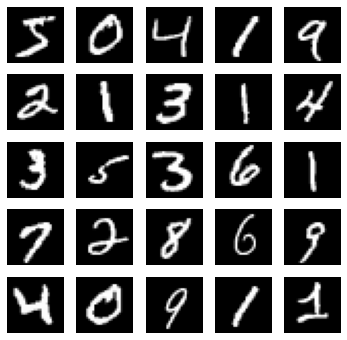

In [52]:
# 데이터 확인하기
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(6,6))
for index in range(25):
    plt.subplot(5 ,5, index+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.axis("off")
    
plt.show()

# 데이터 전처리(정규화, 원핫 인코딩)

In [53]:
# 학습데이터 / 테스트 데이터 정규화
x_train = (x_train - 0.0) / (255.0- 0.0)
x_test = (x_test - 0.0) / (255.0- 0.0)

# 정답 데이터 원핫 인코딩
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [58]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# 활성화 함수를 relu를 가지는 노드를 100개 설정
model.add(tf.keras.layers.Dense(100, activation='relu'))

# 이미지 분류를 위해 활성화 함수를 softmax로 지정함
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [60]:
hist = model.fit(x_train, y_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 2s 984us/step - loss: 0.3229 - accuracy: 0.9104 - val_loss: 0.1998 - val_accuracy: 0.9422
Epoch 2/30
1313/1313 [==============================] - 1s 838us/step - loss: 0.1488 - accuracy: 0.9567 - val_loss: 0.1425 - val_accuracy: 0.9589
Epoch 3/30
1313/1313 [==============================] - 1s 843us/step - loss: 0.1033 - accuracy: 0.9700 - val_loss: 0.1297 - val_accuracy: 0.9618
Epoch 4/30
1313/1313 [==============================] - 1s 822us/step - loss: 0.0773 - accuracy: 0.9765 - val_loss: 0.1164 - val_accuracy: 0.9656
Epoch 5/30
1313/1313 [==============================] - 1s 836us/step - loss: 0.0617 - accuracy: 0.9811 - val_loss: 0.1050 - val_accuracy: 0.9687
Epoch 6/30
1313/1313 [==============================] - 1s 810us/step - loss: 0.0485 - accuracy: 0.9858 - val_loss: 0.1054 - val_accuracy: 0.9683
Epoch 7/30
1313/1313 [==============================] - 1s 837us/step - loss: 0.0387 - accuracy: 0.9890 - val_loss: 0.1014 -

In [61]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 537us/step - loss: 0.1448 - accuracy: 0.9735


[0.14483347535133362, 0.9735000133514404]

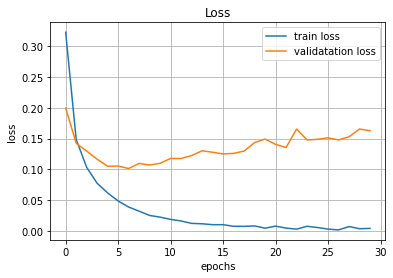

In [62]:
# 손실
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validatation loss')

plt.legend(loc='best')

plt.show()

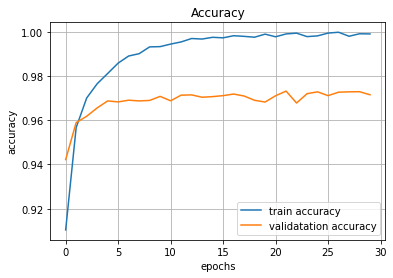

In [63]:
# 정확도
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validatation accuracy')

plt.legend(loc='best')

plt.show()

# 여기서 96 프로 부터 오버 피팅일 발생했을을 아